# Evaluation of Diagnostic Models

> OBJECTIVE:
1. Accuracy
2. Prevalence
3. Specificity & Sensitivity
4. PPV & NPV
5. ROC curve and AUCROC (c-statistic)
6. Confidence Intervals


# 1.Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import util
# from public_tests import *
# from test_utils import *

# 2.Overview

In [2]:
train_results = pd.read_csv("/content/train_preds.csv")
valid_results = pd.read_csv("/content/valid_preds.csv")

# the labels in our dataset
class_labels = ['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

# the labels for prediction values in our dataset
pred_labels = [l + "_pred" for l in class_labels]

In [3]:
# extract labels(y) and predictions (pred)
y = valid_results[class_labels].values
pred = valid_results[pred_labels].values

In [4]:
# let's take a peek at our dataset
valid_results[np.concatenate([class_labels, pred_labels])].head()

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,...,Infiltration_pred,Mass_pred,Nodule_pred,Atelectasis_pred,Pneumothorax_pred,Pleural_Thickening_pred,Pneumonia_pred,Fibrosis_pred,Edema_pred,Consolidation_pred
0,0,0,0,0,0,0,0,0,0,0,...,0.256020,0.266928,0.312440,0.460342,0.079453,0.271495,0.276861,0.398799,0.015867,0.156320
1,0,0,0,0,1,0,1,0,0,0,...,0.382199,0.176825,0.465807,0.489424,0.084595,0.377317,0.363582,0.638024,0.025948,0.144419
2,0,0,0,0,0,0,0,0,0,0,...,0.427727,0.115513,0.249030,0.035105,0.238761,0.167095,0.166389,0.262463,0.007758,0.125790
3,0,0,0,0,0,0,0,0,0,0,...,0.158596,0.259460,0.334870,0.266489,0.073371,0.229834,0.191281,0.344348,0.008559,0.119153
4,0,0,0,0,0,0,0,0,0,0,...,0.536762,0.198797,0.273110,0.186771,0.242122,0.309786,0.411771,0.244666,0.126930,0.342409


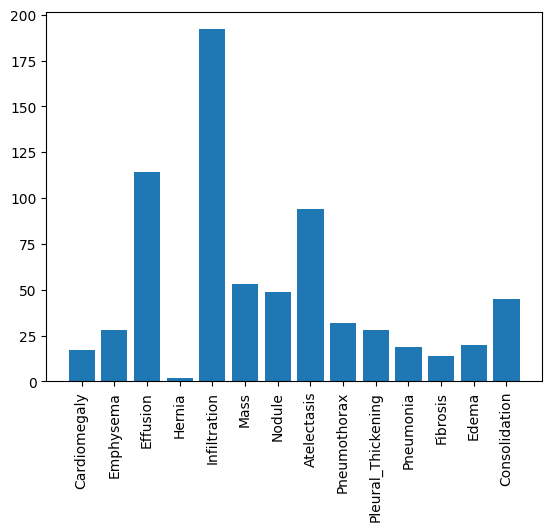

In [5]:
# create histogram of the number of samples for each label in the validation dataset
plt.xticks(rotation=90)
plt.bar(x = class_labels, height= y.sum(axis=0));

- dataset has imbalanced populationof samples.
- small number of patients diagnosed with 'hernia'

# 3.Metrics


## TP, FP, TN, FN
- all metrics can be built off of these 4 statistics
- use threshhold value to convert binary class preds to 0 or 1 (outputs above threshhold:1, outputs below threshhold:0)

In [6]:
def true_positives(y, pred, th=0.5):
    """
    Count true positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TP (int): true positives
    """
    TP = 0

    # get thresholded predictions
    thresholded_preds = pred >= th

    # compute TP
    TP = np.sum((y == 1) & (thresholded_preds == 1))

    return TP

def true_negatives(y, pred, th=0.5):
    """
    Count true negatives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TN (int): true negatives
    """
    TN = 0

    # get thresholded predictions
    thresholded_preds = pred >= th

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # compute TN
    TN = np.sum((y == 0 ) & (thresholded_preds == 0))
    return TN

def false_positives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FP (int): false positives
    """
    FP = 0

    # get thresholded predictions
    thresholded_preds = pred >= th

    # compute FP
    FP = np.sum((y == 0) & (thresholded_preds == 1))
    return FP

def false_negatives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FN (int): false negatives
    """
    FN = 0

    # get thresholded predictions
    thresholded_preds = pred >= th

    # compute FN
    FN = np.sum((y == 1) & (thresholded_preds == 0))
    return FN

In [ ]:
# summary of evaluative metrics for the model predictions for each class
# util.get_performance_metrics(y, pred, class_labels)

!! CONFUSION MATRIX TABLE FOR CLASS LABELS !!

## Accuracy

> accuracy = TP + TN / TP + TN + FP + FN

## Prevalence
- Medical context: proportion of pple in population who have the disease/condition
- ML context: proportion of positive examples
> `prevalence = 1/N 𝛴 y(i)`\
where y(i) = 1, when example is '+ve' (has disease)

## Sensitivity & Specificity

- Sensitivity: prob that the test outputs +ve given the case is actually +ve
> `sensitivity = TP / TP + FN`
- Specificity: prob that the test outputs -ve given the case is acc -ve
> `specificity = TN / TN + FP`

---

- these metrics do not depend on the prevalence of the +ve class in the dataset because:
   - the stats are only computed within pple of the same class
   - sensitivity only considers output on pple in +ve class
   - specificity only considers output on pple in -ve class


- **Diagnostically**,
  - sensitivity and specificity are not helpful
  - they are conditioning on the thing that the diagnostic models wants to find out*

## PPV & NPV
These metrics give the prob that the person has the disease given the test outputs +ve

- PPV: Positive predictive value
> prob that subjects with +ve screening test truly have the disease\
 `ppv = TP / TP + FP`
- NPV: Negative predictive value
> prob that subjects with -ve screening test truly dont have the disease\
 `npv = TN / TN + FN`


---
- despite having high sensitivity and accuracy, the PPV predictions could still be low



## ROC Curve

- created by plotting the true positive rate (TPR) against the FPR at various threshold values
- ideal point is at the top left: TPR=1, FPR=0
- various points on the curve are generated by gradually changing the threshold

- AUCROC or C-statistic: measure of goodness of fit
- medical context: this number gives the prob that a randomly selected patient who experienced a condition had a higher risk score than patient who had not experienced the event.
- this summarizes the model output across all thresholds
- gives a good sense of the discriminative power of given model.


## Confidence Intervals
- calculated values for the metrics are estimates of real-world values
- confidence intervals used to quantify the uncertainity due to the sampling of the dataset

- Bootstrap method: estimates uncertainity by resampling the dataset with replacement.
- bootstrap method is used for estimates with more complicated statistics such as AUC

## Precision-Recall Curve (PRC)
Informative prediction metrics when significant class imbalances are present in the data
- Precision: measure of result relevancy that is equivalent to PPV
- Recall: measure of how many truly relevant results are returned that is equivalent to sensitivity measure.

PRC: shows trade-off between precision and recall for diff thresholds\
High area under-curve:
1. high recall: relates to low false +ve rate
2. high precision: relates to low false -ve rate

High scores: accurate results (high precision) and majority of all +ve results (high recall)




## F1 Score

F1 score: Harmonic mean of precision and recall (best value=1, perfect precisiona nd recall)

## Calibration

Callibration curve: observe how model's generated probabilities are aligned with real probabilities
- generate calibration plot
Well calibrated model has a calibration curve that almost aligns with `y = x` line\

Platt scaling: fix calibration plots
- fits logistic regression model to model scores.
- model built using training portion of dataset to generate the linear mdoel
- model used to calibrate the predictions for the test portion